# 使用するライブラリのインポート

In [122]:
import pandas as pd
import numpy as np 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# CSVファイルをデータフレーム形式として読み込み

In [123]:
movie = pd.read_pickle('./data/movie.pickle')
ratings = pd.read_pickle('./data/review.pickle')
ratings.point.replace({0: 10}, inplace=True)

## 映画情報

In [124]:
movie.head()

mean_review_point  number_of_revier  screening_time  \
0               6.84              44.0           155.0   
1               8.00               1.0           104.0   
2               8.27              11.0           114.0   
3               5.93              14.0           100.0   
4               5.80               5.0           120.0   

                                           genre  movie_id  \
0                     アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942   
1    アクション|ＳＦ|アニメ|シリーズもの|青春もの|学園もの|ＴＶの映画化|漫画の映画化     26788   
2                                 ドラマ|サスペンス|コメディ     25605   
3  アクション|ＳＦ|ファンタジー|アニメ|シリーズもの|ＴＶの映画化|漫画の映画化|３Ｄ映画     24933   
4                   ドラマ|ラブストーリー|青春もの|学園もの|漫画の映画化     23973   

                          movie_title  
0                   シン・エヴァンゲリオン劇場版：||  
1  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション  
2                             メランコリック  
3                       ドラゴンボール超／ブロリー  
4                          ReLIFEリライフ

## レビュー情報

In [125]:
ratings.head()

user_id  movie_id                          movie_tile  \
0    20001     25942                   シン・エヴァンゲリオン劇場版：||   
1    20001     26788  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション   
2    20001     25605                             メランコリック   
3    20001     24933                       ドラゴンボール超／ブロリー   
4    20001     23973                          ReLIFEリライフ   

                                       movie_comment  point  
0  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...      8  
1  空いてそうな時間帯を狙っていきました。時系列的には連続アニメの最新話のあとぐらいの話みたいで...      8  
2  AmazonPrimeで見ました。調べると製作費３００万だそうで。それもあって初めてみる俳優...      8  
3  なお、ドラゴンボールの映画は「神と神」と「復活のF」ぐらいしか見たことがないのでオリジナルの...      6  
4  漫画とアニメ（＋OVA）は全部見てます。で、漫画原作は222話で10冊以上あるのでやもえない...      6

In [126]:
# animeのデータフレームをmemberの値で並び替え
movie.sort_values('number_of_revier', ascending= False)[:10]

mean_review_point  number_of_revier  screening_time  \
178                8.67            1243.0           143.0   
303                6.42             882.0           125.0   
79                 9.02             847.0           116.0   
1047               6.73             844.0           194.0   
173                6.92             815.0           136.0   
1048               6.15             798.0           140.0   
118                8.72             755.0           124.0   
1045               5.26             752.0           153.0   
177                7.06             683.0           107.0   
162                6.85             672.0           154.0   

                                  genre  movie_id      movie_title  
178                    ドラマ|刑務所もの|小説の映画化       152       ショーシャンクの空に  
303            アドベンチャー|ファンタジー|アニメ|ファミリー      2497         千と千尋の神隠し  
79    アクション|ＳＦ|コメディ|アドベンチャー|シリーズもの|青春もの       252  バック・トゥ・ザ・フューチャー  
1047      ドラマ|サスペンス|ラブストーリー|パニックもの|歴史もの       188     タイタニック(1997)  
173         アクション|サスペンス|ＳＦ|シリーズもの|ネットもの       498           マトリックス  
1048                         ドラマ|ミュージカル      1487    ダンサー・イン・ザ・ダーク  
118   アクション|ＳＦ|アドベンチャー|ファンタジー|アニメ|ファミリー       671         天空の城ラピュタ  
1045     アクション|ドラマ|サスペンス|ＳＦ|パニックもの|ロマンス       682     アルマゲドン(1998)  
177   ドラマ|ホラー|サスペンス|ファンタジー|ミステリー|オカルト映画       526         シックス・センス  
162             アクション|ドラマ|戦争もの|時代劇|歴史もの      5377          ラストサムライ

# 基本統計量の確認

In [127]:
# animeの基本統計量の確認
round(movie.describe(),2)

mean_review_point  number_of_revier  screening_time  movie_id
count           24988.00          24988.00        23499.00  25002.00
mean                5.68             20.44          102.33  13308.29
std                 1.59             50.93           25.89   7811.36
min                 0.00              1.00            1.00      2.00
25%                 4.92              2.00           91.00   6453.25
50%                 6.00              5.00          100.00  13314.50
75%                 6.83             15.00          114.00  20112.75
max                10.00           1243.00          705.00  26908.00

<AxesSubplot:>

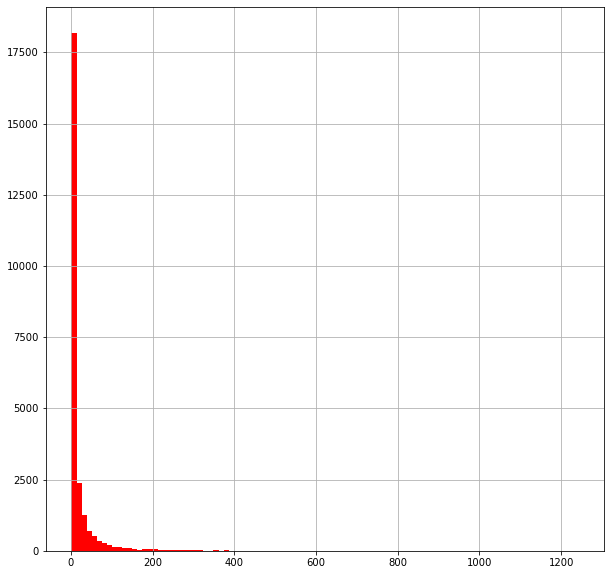

In [128]:
# ratingsのヒストグラムを作成
movie['number_of_revier'].hist(bins=100, figsize=(10,10), color = 'red')

In [129]:
# ratingsの基本統計量の確認
round(ratings.describe(),2)

user_id   movie_id      point
count  452459.00  452459.00  452459.00
mean    23553.95    8109.15       6.27
std      2408.38    7643.07       2.02
min     20001.00       2.00       1.00
25%     20981.00    1376.00       5.00
50%     23685.00    4949.00       6.00
75%     25489.00   14274.00       8.00
max     27973.00   26908.00      10.00

<AxesSubplot:>

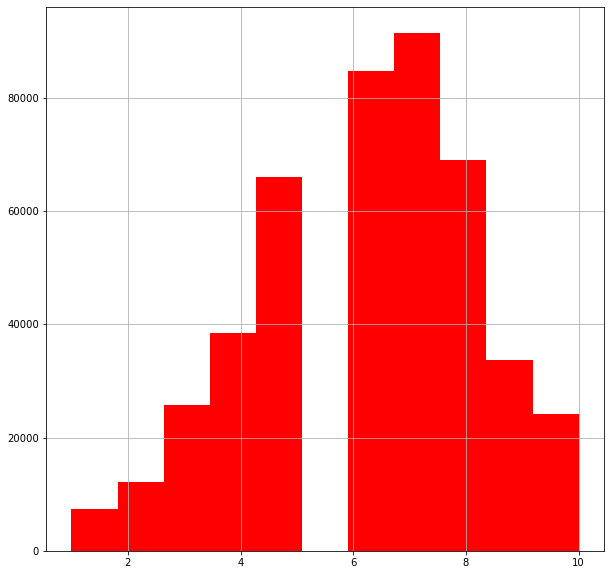

In [130]:
# ratingsのヒストグラムを作成
ratings['point'].hist(bins=11, figsize=(10,10), color = 'red')

# データの前処理

In [132]:
# membersの値が10より大きいデータのみに変更
movie = movie[movie['number_of_revier'] > 10]

In [133]:
# 欠損データの確認
movie.isnull().sum()

mean_review_point      0
number_of_revier       0
screening_time       184
genre                  0
movie_id               0
movie_title            0
dtype: int64

In [134]:
movie[movie['mean_review_point'].isnull()]

Empty DataFrame
Columns: [mean_review_point, number_of_revier, screening_time, genre, movie_id, movie_title]
Index: []

In [135]:
# 欠損データをdropna()でデータセットから取り除く
movie = movie.dropna(subset=['mean_review_point', 'number_of_revier'])

In [136]:
len(movie)

7974

In [137]:
movie.head()

mean_review_point  number_of_revier  screening_time  \
0               6.84              44.0           155.0   
2               8.27              11.0           114.0   
3               5.93              14.0           100.0   
5               2.68              84.0            87.0   
6               7.51              85.0           115.0   

                                           genre  movie_id  \
0                     アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化     25942   
2                                 ドラマ|サスペンス|コメディ     25605   
3  アクション|ＳＦ|ファンタジー|アニメ|シリーズもの|ＴＶの映画化|漫画の映画化|３Ｄ映画     24933   
5                 アクション|ＳＦ|アドベンチャー|ファンタジー|漫画の映画化     16070   
6                       ドラマ|サスペンス|戦争もの|歴史もの|伝記もの     22641   

                 movie_title  
0          シン・エヴァンゲリオン劇場版：||  
2                    メランコリック  
3              ドラゴンボール超／ブロリー  
5        DRAGONBALLEVOLUTION  
6  イミテーション・ゲーム／エニグマと天才数学者の秘密

In [138]:
ratings.head()

user_id  movie_id                          movie_tile  \
0    20001     25942                   シン・エヴァンゲリオン劇場版：||   
1    20001     26788  僕のヒーローアカデミアTHEMOVIE　ワールドヒーローズミッション   
2    20001     25605                             メランコリック   
3    20001     24933                       ドラゴンボール超／ブロリー   
4    20001     23973                          ReLIFEリライフ   

                                       movie_comment  point  
0  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...      8  
1  空いてそうな時間帯を狙っていきました。時系列的には連続アニメの最新話のあとぐらいの話みたいで...      8  
2  AmazonPrimeで見ました。調べると製作費３００万だそうで。それもあって初めてみる俳優...      8  
3  なお、ドラゴンボールの映画は「神と神」と「復活のF」ぐらいしか見たことがないのでオリジナルの...      6  
4  漫画とアニメ（＋OVA）は全部見てます。で、漫画原作は222話で10冊以上あるのでやもえない...      6

次にmovieとratingsのデータを「 movie_id 」を軸にして、「user_id」毎に切り分けてマージさせましょう。  
これで、2つの異なるデータフレームが、ユーザーIDごとに切り分けられた一つのデータフレームとしてマージ（合体）しました。

In [139]:
# animeとratingsの2つのデータフレームをマージさせる
mergeddf = ratings.merge(movie, left_on = 'movie_id', right_on = 'movie_id', suffixes= ['_user', ''])
# 合体したデータフレームの最初の5行を表示
mergeddf.head()

user_id  movie_id         movie_tile  \
0    20001     25942  シン・エヴァンゲリオン劇場版：||   
1    20202     25942  シン・エヴァンゲリオン劇場版：||   
2    20434     25942  シン・エヴァンゲリオン劇場版：||   
3    20857     25942  シン・エヴァンゲリオン劇場版：||   
4    20925     25942  シン・エヴァンゲリオン劇場版：||   

                                       movie_comment  point  \
0  劇場で見てさらにAmazonPrimeで再確認しました。点数は劇場版で見た際のメモの点数のま...      8   
1  子供たちに誘われて一家総出で見に行ったんですけどね。こんなの見終わってから家族でどういう会話...      7   
2  Ｑを復習せず鑑賞。前半はシンジの鬱にイライラ。ひたすらウザい。それに対し周りの人間が優しすぎ...      6   
3  ほんとに終わったのね。序盤の鬱シンジ、もう笑えたわ、なんか。あと中身28歳見た目14歳アスカ...      8   
4  概ね旧劇場版からさらに踏み込んだ補完版という感じでしたが、こういう落とし方が無難でしたかね。...      8   

   mean_review_point  number_of_revier  screening_time  \
0               6.84              44.0           155.0   
1               6.84              44.0           155.0   
2               6.84              44.0           155.0   
3               6.84              44.0           155.0   
4               6.84              44.0           155.0   

                        genre        movie_title  
0  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化  シン・エヴァンゲリオン劇場版：||  
1  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化  シン・エヴァンゲリオン劇場版：||  
2  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化  シン・エヴァンゲリオン劇場版：||  
3  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化  シン・エヴァンゲリオン劇場版：||  
4  アクション|ＳＦ|アニメ|シリーズもの|ＴＶの映画化  シン・エヴァンゲリオン劇場版：||

In [140]:
# mergeddfの基本統計量の確認
round(mergeddf.describe(),2)

user_id   movie_id      point  mean_review_point  number_of_revier  \
count  398585.00  398585.00  398585.00          398585.00         398585.00   
mean    23527.35    7290.41       6.34               6.31            154.86   
std      2382.16    7334.30       2.01               1.14            163.43   
min     20001.00       6.00       1.00               0.69             11.00   
25%     21000.00    1170.00       5.00               5.65             42.00   
50%     23651.00    4193.00       6.00               6.44             96.00   
75%     25458.00   13295.00       8.00               7.12            206.00   
max     27960.00   26701.00      10.00               9.15           1243.00   

       screening_time  
count        394669.0  
mean            116.4  
std              24.6  
min               1.0  
25%             101.0  
50%             114.0  
75%             128.0  
max             705.0

In [141]:
# 不必要な項目と重複項目を削除
mergeddf = mergeddf[['user_id','movie_title','point']]
mergeddf = mergeddf.drop_duplicates(['user_id','movie_title'])
 
# head()で最初の5行を表示
mergeddf.head()

user_id        movie_title  point
0    20001  シン・エヴァンゲリオン劇場版：||      8
1    20202  シン・エヴァンゲリオン劇場版：||      7
2    20434  シン・エヴァンゲリオン劇場版：||      6
3    20857  シン・エヴァンゲリオン劇場版：||      8
4    20925  シン・エヴァンゲリオン劇場版：||      8

# データフレームのピボット

In [142]:
movie_pivot = mergeddf.pivot(index= 'movie_title',columns='user_id',values='point').fillna(0)
movie_pivot_sparse = csr_matrix(movie_pivot.values)

In [143]:
# anime_pivotの最初の10行を表示
movie_pivot.head(10)

user_id              20001  20031  20033  20035  20036  20037  20039  20040  \
movie_title                                                                   
-less［レス］              0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
009RE:CYBORG           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1.0【ワン・ポイント・オー】        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100,000年後の安全           0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1000年女王                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10クローバーフィールド・レーン       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11.25自決の日三島由紀夫と若者たち    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11:14                  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
127時間                  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12人の優しい日本人             0.0    0.0   10.0    0.0    0.0    0.0    0.0    0.0   

user_id              20041  20042  ...  27937  27938  27940  27949  27952  \
movie_title                        ...                                      
-less［レス］              0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
009RE:CYBORG           0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
1.0【ワン・ポイント・オー】        0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
100,000年後の安全           0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
1000年女王                0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
10クローバーフィールド・レーン       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
11.25自決の日三島由紀夫と若者たち    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
11:14                  0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
127時間                  0.0    0.0  ...    0.0    0.0    5.0    0.0    0.0   
12人の優しい日本人             0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   

user_id              27953  27954  27957  27958  27960  
movie_title                                             
-less［レス］              0.0    0.0    0.0    0.0    0.0  
009RE:CYBORG           0.0    0.0    0.0    0.0    0.0  
1.0【ワン・ポイント・オー】        0.0    0.0    0.0    0.0    0.0  
100,000年後の安全           0.0    0.0    0.0    0.0    0.0  
1000年女王                0.0    0.0    0.0    0.0    0.0  
10クローバーフィールド・レーン       0.0    0.0    0.0    0.0    0.0  
11.25自決の日三島由紀夫と若者たち    0.0    0.0    0.0    0.0    0.0  
11:14                  0.0    0.0    0.0    0.0    0.0  
127時間                  0.0    0.0    0.0    0.0    0.0  
12人の優しい日本人             0.0    0.0    0.0    0.0    0.0  

[10 rows x 4074 columns]

# k近傍法（k-nearest neighbors）でレコメンド機能を構築

k近傍法ですが最も単純なアルゴリズムと呼ばれており、クラスタリングのアルゴリズムの一種で、一般的に分類問題などで利用されます。今回のチュートリアルの例で考えると、とあるアニメのタイトルを入力した際に、そのアニメのneighbors（ご近所さん）を探して、距離が近い（類似性が高い）アニメのタイトルをオススメとして返してくれます。

In [144]:
# Scikit-learnのライブラリを利用します
# n_neiborsやalgorithm、metricなど重要なアーギュメントを設定しています
knn = NearestNeighbors(n_neighbors=3,algorithm= 'brute', metric= 'cosine')
 
# 前処理したデータセットでモデルを訓練
model_knn = knn.fit(movie_pivot_sparse)

In [145]:
# データセットのタイトルをキーワードで検索
def searchanime(string):
    print(movie_pivot[movie_pivot.index.str.contains(string)].index[0:])

In [162]:
searchanime('ワイルド')

Index(['イントゥ・ザ・ワイルド', 'オスカー・ワイルド', 'サムシング・ワイルド', 'ザ・ワイルド', 'ワイルド7',
       'ワイルドカード(2014)', 'ワイルドシングス', 'ワイルドシングス２<OV>', 'ワイルドバンチ', 'ワイルド・アット・ハート',
       'ワイルド・エンジェル(2002)', 'ワイルド・ギース', 'ワイルド・スピード', 'ワイルド・スピード／EUROMISSION',
       'ワイルド・スピード／ICEBREAK', 'ワイルド・スピード／MAX', 'ワイルド・スピード／MEGAMAX',
       'ワイルド・スピード／SKYMISSION', 'ワイルド・スピード／スーパーコンボ', 'ワイルド・スピードＸ２',
       'ワイルド・スピードＸ３／TOKYODRIFT', 'ワイルド・バレット', 'ワイルド・レンジ　最後の銃撃',
       'ワイルド・ワイルド・ウエスト'],
      dtype='object', name='movie_title')


In [161]:
# 「はじめの一歩」に対してのオススメのアニメ10個
Movie = 'ミュージック・フロム・アナザー・ルーム'
 
distance, indice = model_knn.kneighbors(movie_pivot.iloc[movie_pivot.index== Movie].values.reshape(1,-1),n_neighbors=10)

for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations if you like the anime {0}:\n'.format(movie_pivot[movie_pivot.index== Movie].index[0]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,movie_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recommendations if you like the anime ミュージック・フロム・アナザー・ルーム:

1: 彼と彼女の第２章 with distance: 0.6017960028230713
2: マンハッタン花物語 with distance: 0.6273070201046156
3: ファイナル・カット（1998年／ドミニク・アンシアーノ監督作） with distance: 0.7042328230915569
4: ディナーラッシュ with distance: 0.7207120660693276
5: ２８ＤＡＹＳ（デイズ） with distance: 0.7229274896002229
6: グッドナイト・ムーン with distance: 0.72574068934254
7: サイモン・バーチ with distance: 0.7273593452982512
8: ピクチャー・パーフェクト／彼女が彼に決めた理由（わけ） with distance: 0.7278487408297669
9: ストーリー・オブ・ラブ with distance: 0.7280305471900198


In [54]:
# 「はじめの一歩」に対してのオススメのアニメ10個
Movie = '最後の恋、初めての恋'
 
distance, indice = model_knn.kneighbors(movie_pivot.iloc[movie_pivot.index== Movie].values.reshape(1,-1),n_neighbors=11)

for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recommendations if you like the anime {0}:\n'.format(movie_pivot[movie_pivot.index== Movie].index[0]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,movie_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

Recommendations if you like the anime 最後の恋、初めての恋:

1: 潜行者 with distance: 0.5820323263306308
2: 海賊黒ひげ with distance: 0.6340885170029213
3: 戦場を駈ける男 with distance: 0.6340885170029213
4: わんぱく旋風 with distance: 0.6340885170029213
5: 脅迫者（1951） with distance: 0.6340885170029213
6: ロビンソン漂流記(1954) with distance: 0.6340885170029213
7: ショックプルーフ with distance: 0.6340885170029213
8: ジェニーの肖像 with distance: 0.6340885170029213
9: 暴れ豪右衛門 with distance: 0.6340885170029213
10: ボレロ with distance: 0.6340885170029213
